In [78]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Read in schools.csv
nyc_sat_scores = pd.read_csv("schools.csv")


# Summarize The Data

In [3]:
# View first few observations
nyc_sat_scores.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [4]:
# Obtain dimensions of the data set
nyc_sat_scores.shape

(375, 7)

In [5]:
# Summarize column types
nyc_sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [6]:
# Obtain summary statistics for the numeric columns
nyc_sat_scores.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


In [15]:
# Number of boroughs in the dataset
nyc_sat_scores.value_counts("borough")

borough
Brooklyn         109
Bronx             98
Manhattan         89
Queens            69
Staten Island     10
Name: count, dtype: int64

In [23]:
# Average math SAT score by borough
math_by_borough = nyc_sat_scores.groupby("borough")["average_math"].mean()
math_by_borough

borough
Bronx            404.357143
Brooklyn         416.403670
Manhattan        455.887640
Queens           462.362319
Staten Island    486.200000
Name: average_math, dtype: float64

In [24]:
# Average reading SAT score by borough
reading_by_borough = nyc_sat_scores.groupby("borough")["average_reading"].mean()
reading_by_borough

borough
Bronx            402.520408
Brooklyn         410.761468
Manhattan        444.932584
Queens           443.260870
Staten Island    478.500000
Name: average_reading, dtype: float64

# Missing Data Exploration

In [29]:
#Check each column for any missing values
nyc_sat_scores.isna().any()

school_name        False
borough            False
building_code      False
average_math       False
average_reading    False
average_writing    False
percent_tested      True
dtype: bool

In [31]:
# Check number of missing values in each column
missing_by_column = nyc_sat_scores.isna().sum()
missing_by_column

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

<Axes: title={'center': 'Number of Missing Values by Column'}>

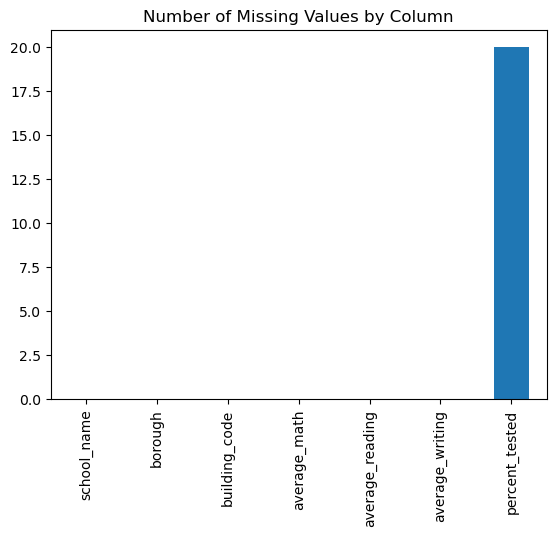

In [33]:
# Plot the number of missing values in each column
missing_by_column.plot(
    kind = "bar",
    title = "Number of Missing Values by Column"
)

# Visualize The Data

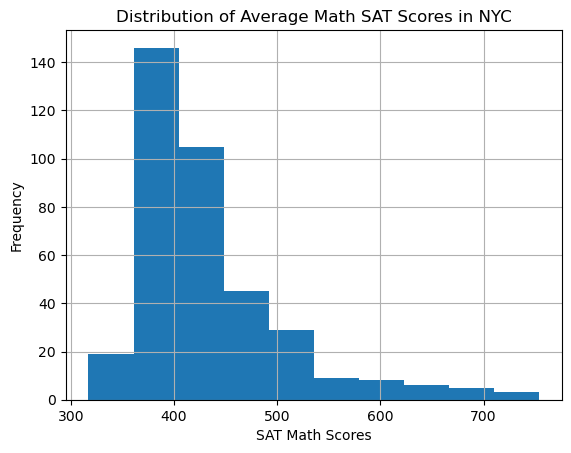

In [35]:
nyc_sat_scores["average_math"].hist()
plt.xlabel("SAT Math Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Average Math SAT Scores in NYC")
plt.show()

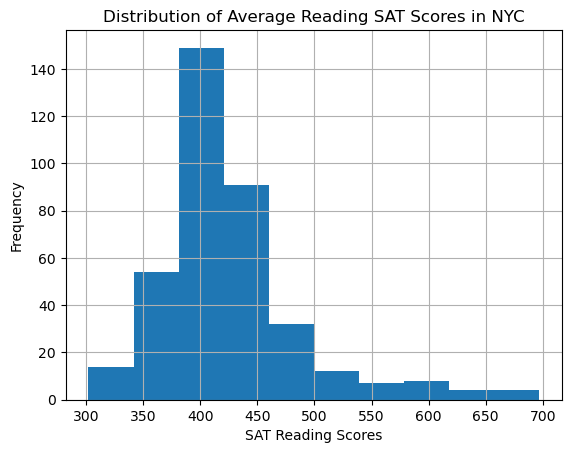

In [36]:
nyc_sat_scores["average_reading"].hist()
plt.xlabel("SAT Reading Scores")
plt.ylabel("Frequency")
plt.title("Distribution of Average Reading SAT Scores in NYC")
plt.show()

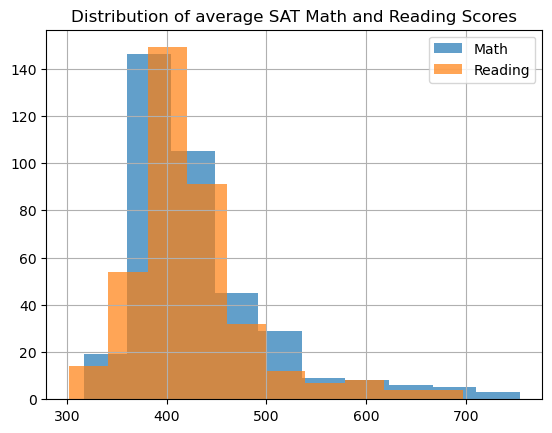

In [96]:
# Math and Reading SAT distributions on same plot
nyc_sat_scores["average_math"].hist(alpha = 0.7)
nyc_sat_scores["average_reading"].hist(alpha = 0.7)

plt.title("Distribution of average SAT Math and Reading Scores")
plt.legend(["Math", "Reading"])
plt.show()


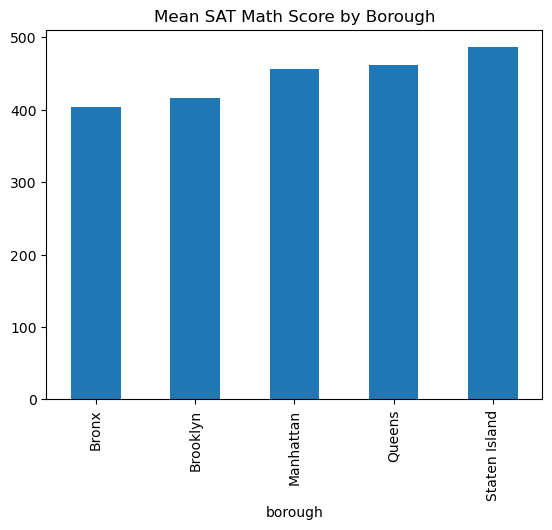

In [19]:
# Plot of average math score by borough
math_by_borough.plot(
    kind = "bar",
    title = "Mean SAT Math Score by Borough")
plt.show()

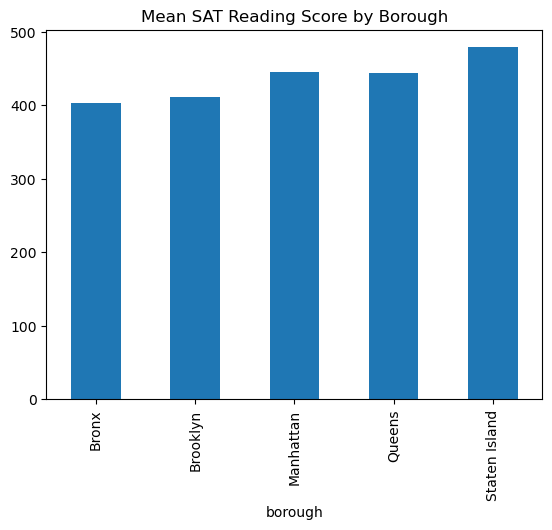

In [100]:
# Plot of average Reading score by borough
reading_by_borough.plot(
    kind = "bar",
    title = "Mean SAT Reading Score by Borough")
plt.show()

# Which NYC schools have the best math results?

In [34]:
# Calculate threshhold for "best math results" (80% of maximum score of 800)
math_sat_max = 800
math_cutoff = 0.80 * math_sat_max
math_cutoff 

640.0

In [52]:
# Filter for schools with average math SAT score > 640
best_math_schools = nyc_sat_scores[nyc_sat_scores["average_math"] >= 640]
best_math_schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9


In [63]:
best_math_schools = best_math_schools.sort_values(by = "average_math",ascending = False)
best_math_schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0


In [94]:
# Keep only school_name and average_math columns
best_math_schools = best_math_schools[["school_name","average_math"]]
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


# Top 10 performing schools based on the combined SAT scores?

In [67]:
# Create total_sat column (math + reading + writing)
nyc_sat_scores["total_SAT"] = nyc_sat_scores["average_math"] + nyc_sat_scores["average_reading"] + nyc_sat_scores["average_writing"]
nyc_sat_scores

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197
...,...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6,1086
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5,1114
372,Channel View School for Research,Queens,Q410,427,430,423,76.6,1280
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5,1207


In [70]:
# Sort in descending order by total SAT score
nyc_sat_scores = nyc_sat_scores.sort_values(by = "total_SAT", ascending = False)
nyc_sat_scores

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981
...,...,...,...,...,...,...,...,...
171,Kingsbridge International High School,Bronx,X430,366,311,310,NaN,987
337,Pan American International High School,Queens,Q744,340,320,318,31.9,978
295,International High School at Prospect Heights,Brooklyn,K440,344,302,300,81.7,946
247,Multicultural High School,Brooklyn,K420,319,323,284,NaN,926


In [72]:
# Filter the top 10
top_10_schools = nyc_sat_scores[:10]
top_10_schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4,2144
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7,2041
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0,2041
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8,2013
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1,1981
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9,1947
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8,1914
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5,1896
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0,1889
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6,1889


In [95]:
# Select the school name and total SAT columns
top_10_schools = top_10_schools[["school_name", "total_SAT"]]
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
93,Staten Island Technical High School,2041
170,Bronx High School of Science,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


# Which single borough has the largest standard deviation in the combined SAT score?

In [83]:
# Calculate standard deviation by borough
nyc_sat_scores.groupby("borough")["total_SAT"].std().sort_values(ascending = False)


borough
Manhattan        230.294140
Staten Island    222.303596
Queens           195.252899
Brooklyn         154.868427
Bronx            150.393901
Name: total_SAT, dtype: float64

In [84]:
# Calculate mean total SAT score by borough
nyc_sat_scores.groupby("borough")["total_SAT"].mean().sort_values(ascending = False)

borough
Staten Island    1439.000000
Queens           1345.478261
Manhattan        1340.134831
Brooklyn         1230.256881
Bronx            1202.724490
Name: total_SAT, dtype: float64

In [89]:
# Create DataFrame
largest_std_dev = {
    "borough": ["Manhattan"],
    "num_schools":[89],
    "average_SAT": [1340.13],
    "std_SAT": [230.29]    
}

largest_std_dev = pd.DataFrame(largest_std_dev)
largest_std_dev


,borough,num_schools,average_SAT,std_SAT
0,Manhattan,89,1340.13,230.29
